### Introduction

##### This project involves assessing and cleaning data derived from Twitter database as an example of how real-life data exists.

##### There are several steps required to be carried out in the project which are:
#### Data Gathering from the Twitter Database ('we rate dogs) and provided data to be imported.
#### Assessing the Data gathered
#### Cleaning data
#### Storing the Data, 
#### Analyzing the Data, and Visualization to derive insight.
#### Reporting

### Key Metrics/Action Points
##### To derive original ratings (no retweets) that have images from the dataset. 
##### To assess and clean the dataset with at least eight (8) quality issues and two (2) tidiness issues taken care of.
##### To create copies of datasets and merge all into a master dataset, then saved into an external csv file. 
##### To generate at least three insights and one visualization from the dataset.
##### To report wrangling and visualization activities carried out.

In [1]:
# Importing libraries

import requests
import tweepy
import pandas as pd
import datetime as dt
import numpy as np
import urllib.request
import pandas as pd
import csv
import re
import json
from timeit import default_timer as timer
from tweepy import OAuthHandler
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

### Data Gathering

##### Twitter Archive Data provided by Udacity
##### Image Predictions Data - imported programmatically from server 
##### Twitter Api Data - twitter data made available by udacity with the functionality codes provided.


### 1. Twitter Archive Data

In [2]:
Data = pd.read_csv('C:/Users/gameon/Downloads/twitter-archive-enhanced.csv')

In [3]:
Data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### 2. Image Predictions Data

In [5]:
# Using requests library to download tsv file hosted on udacity server

url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
Tweet_Data = pd.read_csv(url, sep = "\t")

In [6]:
Tweet_Data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
Tweet_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


### Twitter Api_Data

In [8]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

In [9]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [10]:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
##tweet_ids = Data.tweet_id.values
##len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
        #count += 1
        #print(str(count) + ": " + str(tweet_id))
        #try:
         #   tweet = api.get_status(tweet_id, tweet_mode='extended')
          #  print("Success")
          #  json.dump(tweet._json, outfile)
          #  outfile.write('\n')
       # except tweepy.errors.TweepyException as e:
        #    print("Fail")
         #   fails_dict[tweet_id] = e
          #  pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [11]:
# Read the saved tweet_json.txt file into a dataframe
# read the file in DataFrame
with open('C:/Users/gameon/Downloads/tweet-json.txt', 'r') as f:
    Api_Data = pd.read_json(f, lines= True, encoding = 'utf-8')

In [12]:
Api_Data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [13]:
Api_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

###### selecting the columns of interest : 'id', 'favorite_count','retweet_count' from the dataset then view

In [14]:
Api_Data = Api_Data.loc[:,['id','favorite_count','retweet_count']]

# check for the top 5 rows
Api_Data.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


### Assessing the Data Visually and Programmatically


##### 1. Twitter Archived Enhanced Data

In [15]:
#Visual assessment
Data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


##### The visual assessment shows an overview of our data having 2356 rows and 17 columns, some NaN and None values, web links and texts.

In [16]:
#Programmatic inspection

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

##### We are able to observe some completeness issues in our data

In [17]:
Data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
#Checking for duplicacy and Datatype correlation
print(Data.duplicated().sum())
print(Data.dtypes)

0
tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object


In [19]:
Data['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [20]:
Data['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
# Checking for retweets in the dataset
len(Data[Data.retweeted_status_id.isnull() == False])

181

In [22]:
# Sorting the rating denominator values
Data['rating_denominator'].value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [23]:
# Sorting by the rating numerator values
Data['rating_numerator'].value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [25]:
# To assess the data with decimals incorrectly extracted
ratings_two = Data.text.str.extract('(\d+\.\d+)')

In [26]:
ratings_two.dropna()

,0
45,13.5
259,2.4
340,9.75
695,9.75
763,11.27
1018,2.0
1294,4.3
1689,9.5
1712,11.26
1768,92.49


In [27]:
# Assessing the values of the data with decimals to determine the accurate numerators and denominators
Data.loc[[45, 259, 695, 763, 1018, 1294, 1689, 1712, 1768, 1790, 2347]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
259,843235543001513987,NaN,NaN,2017-03-18 22:59:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tycho. She just had new wheels install...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/843235543...,13,10,Tycho,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1018,746818907684614144,6.914169e+17,4.196984e+09,2016-06-25 21:34:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746818907...,13,10,None,None,None,None,None
1294,707995814724026368,NaN,NaN,2016-03-10 18:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Farfle. He lost his back legs during t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707995814...,12,10,Farfle,None,None,None,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None
1768,678389028614488064,NaN,NaN,2015-12-20 01:38:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She just learned that her final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678389028...,11,10,Bella,None,None,pupper,None
1790,677530072887205888,NaN,NaN,2015-12-17 16:45:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Axel. He's a Black Chevy Pinot on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677530072...,9,10,Axel,None,None,None,None


In [28]:
pd.set_option('display.max_colwidth', -1)
Data['text'].loc[[45, 259, 695, 763, 1018, 1294, 1689, 1712, 1768, 1790, 2347]]

45      This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948                         
259     This is Tycho. She just had new wheels installed. About to do a zoom. 0-60 in 2.4 seconds. 13/10 inspirational as h*ck https://t.co/DKwp2ByMsL                   
695     This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                 
763     This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
1018    Guys... Dog Jesus 2.0\n13/10 buoyant af https://t.co/CuNA7OwfKQ                                                                                                  
1294    This is Farfle. He lost his back legs during the Battle of Gettysburg. Goes 0-60 in 4.3 seconds (damn) 12/10 hero af https://t.co/NiQQWzIzzq  

In [29]:
Data['name'].value_counts()

None          745
a             55 
Charlie       12 
Lucy          11 
Cooper        11 
              .. 
Eleanor       1  
Lambeau       1  
officially    1  
Cermet        1  
Chloe         1  
Name: name, Length: 957, dtype: int64

In [30]:
Data[['doggo', 'floofer', 'pupper', 'puppo']].apply(pd.Series.value_counts)

,doggo,floofer,pupper,puppo
None,2259.0,2346.0,2099.0,2326.0
doggo,97.0,NaN,NaN,NaN
floofer,NaN,10.0,NaN,NaN
pupper,NaN,NaN,257.0,NaN
puppo,NaN,NaN,NaN,30.0


### NOTES:

#### Quality:
 
###### 1. The columns related to replies are not applicable for original tweets
###### 2. The numerator and denominator columns have invalid values.
###### 3. timestamp should be datetime instead of object.
###### 4. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns are not needed as well as rows assocaited with the retweeted_status_id
###### 5. Incorrect or missing names in name column
###### 6. Values of "None" in the name column.

#### Tidiness:

###### 1. There are 4 columns for dog stages (doggo, floofer, pupper, puppo) with the same measurement.
###### 2. The source column has html

### 2. Image Predictions Data

In [31]:
#Visually inspecting the Data
Tweet_Data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [32]:
#Programmatic inspection
Tweet_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [33]:
print(Tweet_Data.shape)
print(Tweet_Data.describe())

(2075, 12)
           tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17  1.203855     0.594548     1.345886e-01  6.032417e-02
std    6.785203e+16  0.561875     0.271174     1.006657e-01  5.090593e-02
min    6.660209e+17  1.000000     0.044333     1.011300e-08  1.740170e-10
25%    6.764835e+17  1.000000     0.364412     5.388625e-02  1.622240e-02
50%    7.119988e+17  1.000000     0.588230     1.181810e-01  4.944380e-02
75%    7.932034e+17  1.000000     0.843855     1.955655e-01  9.180755e-02
max    8.924206e+17  4.000000     1.000000     4.880140e-01  2.734190e-01


In [34]:
Tweet_Data.duplicated().sum()

0

In [35]:
Tweet_Data['jpg_url'].duplicated().sum()

66

In [36]:
Tweet_Data['img_num'].value_counts()

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

In [37]:
#Number of dog breeds
Tweet_Data['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
pug                   57 
                      .. 
crash_helmet          1  
china_cabinet         1  
bookcase              1  
killer_whale          1  
cuirass               1  
Name: p1, Length: 378, dtype: int64

### Notes

######  1. About 281 IDs are missing comparing the data against the archive data.
###### 2. The p1, p2, p3 data have columns instead of spaces between them
###### 3. p1, p2 and p3 should be categoral datatype
###### 4. p1_conf, p2_conf and p3_conf columns should be merged
###### 5. p1_dog, p2_dog and p3_dog columns should be merged

### 3. Api Data

In [38]:
# Visual inspection of the dataset
Api_Data.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [39]:
#Programmatic inspection of the dataset
Api_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.2 KB


In [40]:
Api_Data.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [41]:
# check for datasets shape and completeness
Api_Data.shape

(2354, 3)

In [42]:
Api_Data.duplicated().sum()

0

### Notes

###### Number of missing IDs are about 2when compared to the archive dataset.
###### The id column should be renamed to allow merging of the datasets

## Cleaning

In [43]:
#Creating copies of the dataframes
Data_Clean = Data.copy()
Tweet_Data_Clean = Tweet_Data.copy()
Api_Data_Clean = Api_Data.copy()

### 1. Twitter Archive Data

### Define

#### Drop columns: (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

#### Drop rows with values in the retweeted_status_id

### Code

In [44]:
# Removing rows with values in retweeted_status_id column
Data_Clean = Data_Clean[Data_Clean['retweeted_status_id'].isnull()]

# Dropping unecessary columns
Data_Clean = Data_Clean.drop('in_reply_to_status_id', 1)
Data_Clean = Data_Clean.drop('in_reply_to_user_id', 1)
Data_Clean = Data_Clean.drop('retweeted_status_id', 1)
Data_Clean = Data_Clean.drop('retweeted_status_user_id', 1)
Data_Clean = Data_Clean.drop('retweeted_status_timestamp', 1)

### Test

In [45]:
Data_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 144.4+ KB


### Define

#### Cleaning the Numerator and Denominator

### Code

In [46]:
#replacing the errors in the data values

index_points = [45,695,763,1689,1712,313,2335,1068,1165,1202,1662]
values = [13.5,9.75,11.27,9.5,11.26,13,9,14,13,11,10]
for i, values in zip(index_points,values):
    Data_Clean.loc[i, 'rating_numerator'] = values
    Data_Clean.loc[i, 'rating_denominator'] = 10

#drop the invalid rating index 516
Data_Clean.drop(index=516, inplace=True)

### Test

In [47]:
#confirming that the index 516 has been dropped
print(516 in Data_Clean.index)

False


In [48]:
#Confirming if the numerator values have been corrected
Data_Clean.loc[[45, 259, 695, 763, 1018, 1294, 1689, 1712, 1768, 1790, 2347]]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10,Bella,None,None,None,None
259,843235543001513987,2017-03-18 22:59:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tycho. She just had new wheels installed. About to do a zoom. 0-60 in 2.4 seconds. 13/10 inspirational as h*ck https://t.co/DKwp2ByMsL,"https://twitter.com/dog_rates/status/843235543001513987/photo/1,https://twitter.com/dog_rates/status/843235543001513987/photo/1,https://twitter.com/dog_rates/status/843235543001513987/photo/1",13.00,10,Tycho,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10,Sophie,None,None,pupper,None
1018,746818907684614144,2016-06-25 21:34:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys... Dog Jesus 2.0\n13/10 buoyant af https://t.co/CuNA7OwfKQ,https://twitter.com/dog_rates/status/746818907684614144/photo/1,13.00,10,None,None,None,None,None
1294,707995814724026368,2016-03-10 18:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Farfle. He lost his back legs during the Battle of Gettysburg. Goes 0-60 in 4.3 seconds (damn) 12/10 hero af https://t.co/NiQQWzIzzq,https://twitter.com/dog_rates/status/707995814724026368/photo/1,12.00,10,Farfle,None,None,None,None
1689,681340665377193984,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,9.50,10,None,None,None,None,None
1712,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10,None,None,None,None,None
1768,678389028614488064,2015-12-20 01:38:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bella. She just learned that her final grade in chem was a 92.49 \npoor pupper 11/10 https://t.co/auOoKuoveM,https://twitter.com/dog_rates/status/678389028614488064/photo/1,11.00,10,Bella,None,None,pupper,None
1790,677530072887205888,2015-12-17 16:45:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Axel. He's a Black Chevy Pinot on wheels. 0 to 60 in 5.7 seconds (if downhill). 9/10 I call shotgun https://t.co/DKe9DBnnHE,https://twitter.com/dog_rates/status/677530072887205888/photo/1,9.00,10,Axel,None,None,None,None


### Define

#### Combining the Numerator and Denominator columns into a dog_score column and drop the former

### Code

In [49]:
#Replacing the numerator and denominator columns with a calculated dog_score column

#divide the rating_numerator / rating_denominator and then mulitiply by 10 into another column
Data_Clean['dog_score'] = 10 * Data_Clean.rating_numerator / Data_Clean.rating_denominator
#dropping the rating_numerator & rating_denominator columns
Data_Clean.drop(['rating_numerator','rating_denominator'],axis=1,inplace=True)

### Test

In [50]:
#Confirming that the dog_score column has been created
Data_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweet_id       2174 non-null   int64  
 1   timestamp      2174 non-null   object 
 2   source         2174 non-null   object 
 3   text           2174 non-null   object 
 4   expanded_urls  2116 non-null   object 
 5   name           2174 non-null   object 
 6   doggo          2174 non-null   object 
 7   floofer        2174 non-null   object 
 8   pupper         2174 non-null   object 
 9   puppo          2174 non-null   object 
 10  dog_score      2174 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 191.4+ KB


### Define

#### Adjust timestamp datatype

### Code

In [51]:
#Converting the timestamp datatype
Data_Clean['timestamp'] = pd.to_datetime(Data_Clean.timestamp)

### Test

In [52]:
Data_Clean.dtypes

tweet_id         int64              
timestamp        datetime64[ns, UTC]
source           object             
text             object             
expanded_urls    object             
name             object             
doggo            object             
floofer          object             
pupper           object             
puppo            object             
dog_score        float64            
dtype: object

### Define

#### Replacing all names with errors and the value of None in the column

### Code

In [53]:
Data_Clean[Data_Clean.name.str.islower()==True]['name'].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [54]:
Name_Adjust = ['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space']
for x in Name_Adjust:
    Data_Clean.name.replace(x, 'None', inplace=True)
    Data_Clean.name.replace('None', np.nan, inplace=True)

### Test

In [55]:
Data_Clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


### Define

#### Merge the dog stages columns

### Code

In [56]:
#Converting the dog stages into a single column and dropping the other columns

life_stage = ['doggo', 'floofer', 'pupper', 'puppo']
# replace the 'None' string with np.nan 
Data_Clean[life_stage] = Data_Clean[life_stage].replace('None', np.nan)

# create the dog_stage column
Data_Clean['dog_stage'] = Data_Clean[life_stage].\
                                        apply(lambda x: ', '.join(x.dropna().astype(str)),axis =1)
# replace the empty string with nan and change datatype to category
Data_Clean.dog_stage = Data_Clean.dog_stage.replace('', np.nan).astype('category')

# drop the 4 columns
Data_Clean = Data_Clean.drop(columns = life_stage, axis =1)

### Test

In [57]:
Data_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2174 non-null   int64              
 1   timestamp      2174 non-null   datetime64[ns, UTC]
 2   source         2174 non-null   object             
 3   text           2174 non-null   object             
 4   expanded_urls  2116 non-null   object             
 5   name           1390 non-null   object             
 6   dog_score      2174 non-null   float64            
 7   dog_stage      344 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int64(1), object(4)
memory usage: 168.2+ KB


### Define

#### Clean the Source column, remove the html

### Code

In [58]:
#Cleaning the Source column
Data_Clean['source'] = Data_Clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

### Test

In [59]:
Data_Clean['dog_stage'].value_counts()

pupper            224
doggo             75 
puppo             24 
doggo, pupper     10 
floofer           9  
doggo, puppo      1  
doggo, floofer    1  
Name: dog_stage, dtype: int64

In [60]:
Data_Clean['source'].value_counts()

Twitter for iPhone     2041
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

### 2. Image Predictions

### Define

#### converting p1, p2, p3 to categorical datatypes

### Code

In [61]:
Tweet_Data_Clean['p1'] = Tweet_Data.p1.astype('category')
Tweet_Data_Clean['p2'] = Tweet_Data.p1.astype('category')
Tweet_Data_Clean['p3'] = Tweet_Data.p1.astype('category')

### Test

In [62]:
Tweet_Data_Clean.dtypes

tweet_id    int64   
jpg_url     object  
img_num     int64   
p1          category
p1_conf     float64 
p1_dog      bool    
p2          category
p2_conf     float64 
p2_dog      bool    
p3          category
p3_conf     float64 
p3_dog      bool    
dtype: object

### Define

#### remove false vlaues in the prediction ~and confidence columns

### Code

In [63]:
# removing rows with False p1_dog, p2_dog, & p3_dog values
Tweet_Data_Clean = Tweet_Data_Clean[((Tweet_Data_Clean['p1_dog'] == True) & 
                  (Tweet_Data_Clean['p2_dog'] == True) & 
                  (Tweet_Data_Clean['p3_dog'] == True))]

### Test

In [64]:
Tweet_Data_Clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Welsh_springer_spaniel,0.156665,True,Welsh_springer_spaniel,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,redbone,0.074192,True,redbone,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,German_shepherd,0.138584,True,German_shepherd,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Rhodesian_ridgeback,0.360687,True,Rhodesian_ridgeback,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,miniature_pinscher,0.243682,True,miniature_pinscher,0.154629,True


### Define

#### Replacing the hyphens in p1, p2, p3 with spaces.

### Code

In [65]:
Tweet_Data_Clean.p1=Tweet_Data_Clean.p1.str.replace('_',' ')
Tweet_Data_Clean.p2=Tweet_Data_Clean.p2.str.replace('_',' ')
Tweet_Data_Clean.p3=Tweet_Data_Clean.p3.str.replace('_',' ')

Tweet_Data_Clean.p1=Tweet_Data_Clean.p1.str.replace('-',' ')
Tweet_Data_Clean.p2=Tweet_Data_Clean.p2.str.replace('-',' ')
Tweet_Data_Clean.p3=Tweet_Data_Clean.p3.str.replace('-',' ')

### Test

In [66]:
Tweet_Data_Clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Welsh springer spaniel,0.156665,True,Welsh springer spaniel,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,redbone,0.074192,True,redbone,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,German shepherd,0.138584,True,German shepherd,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Rhodesian ridgeback,0.360687,True,Rhodesian ridgeback,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,miniature pinscher,0.243682,True,miniature pinscher,0.154629,True


### Api Data

### Define

#### Renaming the id column

### Code

In [67]:
# Renaming the ID column
Api_Data_Clean.rename(columns={'id' : 'tweet_id', 'favorite_count' : 'favorites', 'retweet_count' : 'retweets'}, inplace=True)

In [68]:
Api_Data_Clean.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


### Merging the Three Datasets

In [69]:
# use the merge function to merge all three datasets on the tweet id column
Master_Data = pd.merge(Data_Clean, Tweet_Data_Clean, how = 'inner', on = 'tweet_id')
Master_Data = pd.merge(Master_Data, Api_Data_Clean, on='tweet_id', how='inner')

In [70]:
Master_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1202 entries, 0 to 1201
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       1202 non-null   int64              
 1   timestamp      1202 non-null   datetime64[ns, UTC]
 2   source         1202 non-null   object             
 3   text           1202 non-null   object             
 4   expanded_urls  1202 non-null   object             
 5   name           851 non-null    object             
 6   dog_score      1202 non-null   float64            
 7   dog_stage      190 non-null    category           
 8   jpg_url        1202 non-null   object             
 9   img_num        1202 non-null   int64              
 10  p1             1202 non-null   object             
 11  p1_conf        1202 non-null   float64            
 12  p1_dog         1202 non-null   bool               
 13  p2             1202 non-null   object           

### Storing The Master Dataset

In [71]:
Master_Data.to_csv('master_twitter_data.csv', encoding='utf-8', index=False)

In [72]:
Twitter_Data=pd.read_csv('master_twitter_data.csv')
Twitter_Data.head()

,tweet_id,timestamp,source,text,expanded_urls,name,dog_score,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,13.0,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Chihuahua,0.090647,True,Chihuahua,0.068957,True,33819,6514
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,12.0,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,Chihuahua,0.078253,True,Chihuahua,0.031379,True,25461,4328
2,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,12.0,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,basset,0.225770,True,basset,0.175219,True,41048,9774
3,890729181411237888,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",NaN,13.0,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,...,0.566142,True,Pomeranian,0.178406,True,Pomeranian,0.076507,True,56848,16716
4,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,Zoey,13.0,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,...,0.487574,True,Irish terrier,0.193054,True,Irish terrier,0.118184,True,28226,4429


### Analysis & Visualization

In [73]:
# Setting the timestamp as the index
Twitter_Data.set_index('timestamp', inplace=True)
Twitter_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1202 entries, 2017-08-01 00:17:27+00:00 to 2015-11-15 22:32:08+00:00
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweet_id       1202 non-null   int64  
 1   source         1202 non-null   object 
 2   text           1202 non-null   object 
 3   expanded_urls  1202 non-null   object 
 4   name           851 non-null    object 
 5   dog_score      1202 non-null   float64
 6   dog_stage      190 non-null    object 
 7   jpg_url        1202 non-null   object 
 8   img_num        1202 non-null   int64  
 9   p1             1202 non-null   object 
 10  p1_conf        1202 non-null   float64
 11  p1_dog         1202 non-null   bool   
 12  p2             1202 non-null   object 
 13  p2_conf        1202 non-null   float64
 14  p2_dog         1202 non-null   bool   
 15  p3             1202 non-null   object 
 16  p3_conf        1202 non-null   float64
 17  p3_dog      

### Insight 1

#### The Most Common Devices Used by the Audience

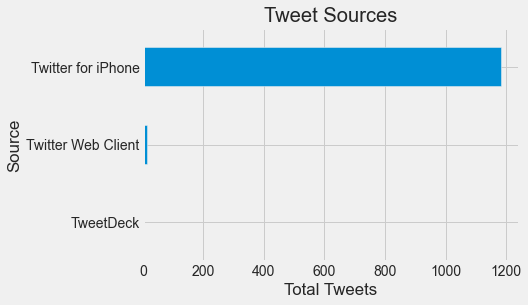

In [74]:
plt.title("Tweet Sources")
Master_Data.source.value_counts().sort_values().plot(kind ='barh')
plt.xlabel('Total Tweets')
plt.ylabel('Source');

#### Majority of the Users are using IPhone

### Insight 2

#### Most Common Dog Names

Text(0, 0.5, "Dog's Name")

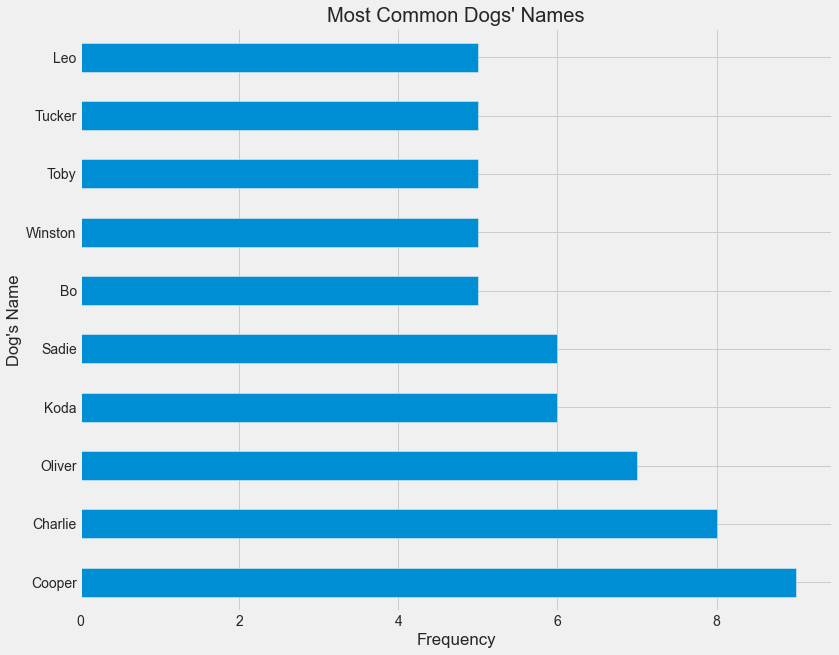

In [75]:
# Plotting the Top 10 Names
plt.figure(figsize=(12, 10))
Master_Data.name.value_counts().nlargest(10).plot(kind = 'barh')
plt.title("Most Common Dogs' Names")
plt.xlabel('Frequency')
plt.ylabel("Dog's Name")

#### Most of the dogs were given the name Cooper

### Insight 3

#### Most Common Dog Stage

Text(0, 0.5, 'Frequency')

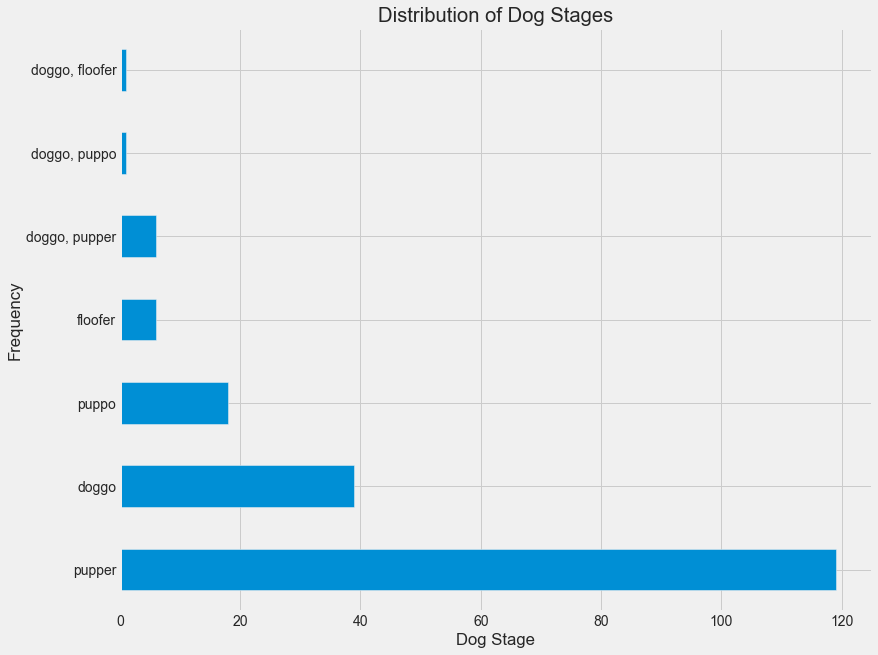

In [76]:
plt.figure(figsize=(12,10))
# select the dog_ stage frequencies
Master_Data.dog_stage.value_counts().plot(kind='barh')
plt.title("Distribution of Dog Stages")
plt.xlabel('Dog Stage')
plt.ylabel('Frequency')

#### Most of the dogs are in the pupper stage

### Insight 4

#### Dog breed with the highest score

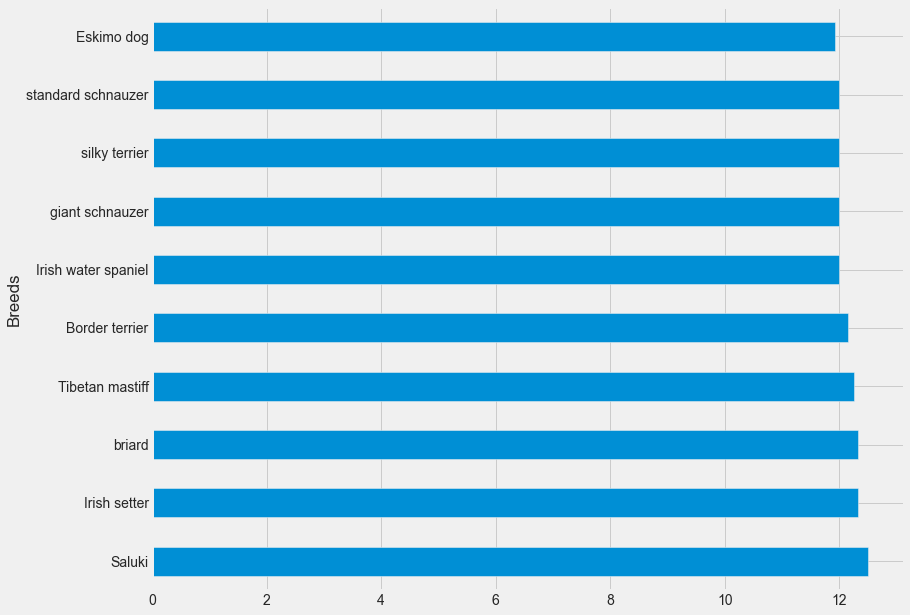

In [77]:
melt = Master_Data.melt('dog_score', value_vars=['p1', 'p2', 'p3'], value_name='Breeds')
plt.figure(figsize=(12,10))
melt.groupby('Breeds')['dog_score'].mean().nlargest(10).plot(kind='barh')

#### The cumber breed is the breed with the highest average score

### Insight 5
#### Most Common Dog Breeds

Text(0, 0.5, 'Count')

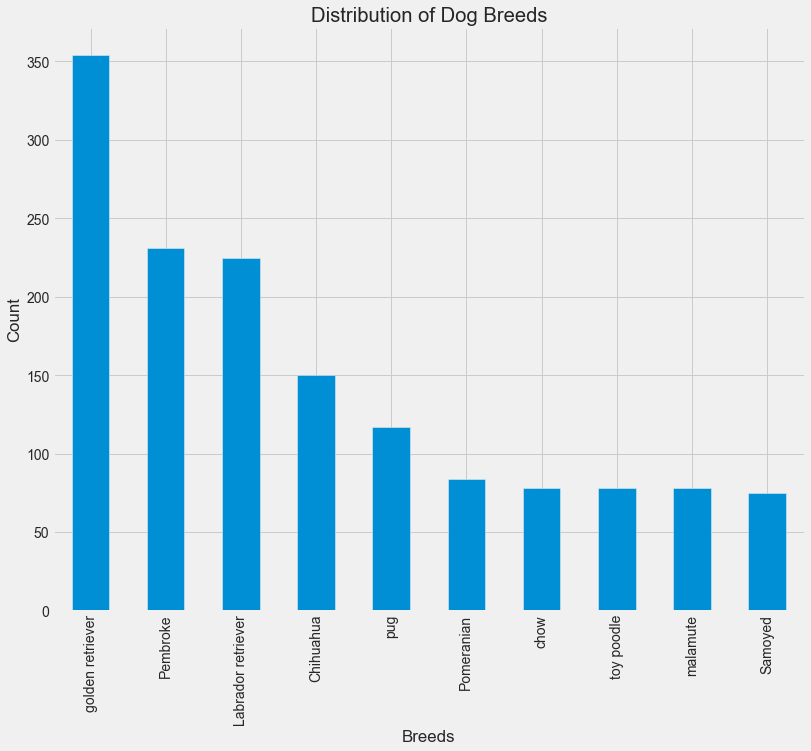

In [80]:
# frequency for dog breeds
plt.figure(figsize=(12,10))
melt.Breeds.value_counts()[:10].plot(kind='bar')
plt.title('Distribution of Dog Breeds')
plt.xlabel('Breeds')
plt.ylabel('Count')

#### The Golden Retriever is the most common breed of dog represented in the data

### Insight 6

#### Corellation between Retweets and Likes 

Text(0.5, 1.0, 'Retweets and favorites Scatter plot')

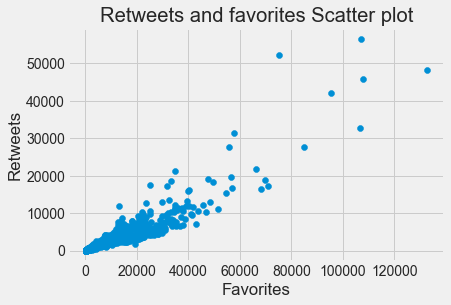

In [81]:
plt.scatter(Master_Data['favorites'], Master_Data['retweets'])
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

#### It appears that there is likes increases as the retweets increase

### Conclusions

#### 1. From the Wrangling process, I was able to carry some necessary cleaning on the data to enhance the analysis adn give better results
#### 2. From the Analysis and Visualization, we were able to uncover a number of insights from the data;
#### a. Most of the users were using iPhones which depicts that most of the dog owners can afford the expenses of taking care of their pets.
#### b. Most people named their dogs cooper.
#### c. The cumber breed has the highest score which reflects the likability of the dog breed compared to others.
#### d. The Pupper stage is the most common dog stage which could also indicates why msot of the pictures got a likes.
#### e. The golden retriever is the most common dog breed in the data which could also be because of the breeds' companionship trait 
#### f. The Data also shows that there is a positive correlation between the retweets and likes, which shows that as the retweets increased, the likes also increased.